In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%cd drive/My\ Drive/KD100/fer2013.csv

/content/drive/My Drive/KD100/fer2013.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
df=pd.read_csv('fer2013.csv')

In [6]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [7]:
df['pixels'].iloc[0]
# imgs as seq of pix 

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

In [8]:
len(df['pixels'].iloc[0].split(' '))
#2304 --> (48,48)


2304

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
emotion    35887 non-null int64
pixels     35887 non-null object
Usage      35887 non-null object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [0]:
df.groupby(by=['Usage','emotion']).count()

pixels
Usage       emotion        
PrivateTest 0           491
            1            55
            2           528
            3           879
            4           594
            5           416
            6           626
PublicTest  0           467
            1            56
            2           496
            3           895
            4           653
            5           415
            6           607
Training    0          3995
            1           436
            2          4097
            3          7215
            4          4830
            5          3171
            6          4965

In [10]:
df['emotion'].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [0]:
#images by seq
def get_img(seq):
  ls=[int(x) for x in seq.split(' ')]
  arr=np.array(ls)
  arr=np.reshape(arr,(48,48))
  return arr

#all images 
def get_all_imgs(df):
  sh=df['pixels'].shape[0]
  arr=np.zeros((sh,48,48))
  for c,i in enumerate(df['pixels'].values):
    arr[c]=get_img(i)
  return arr



In [0]:
imgs=get_all_imgs(df)

In [13]:
from sys import getsizeof
print(getsizeof(imgs)/1000000)
print(imgs.shape[0])

#size of imgs in the memmory mb

661.469312
35887


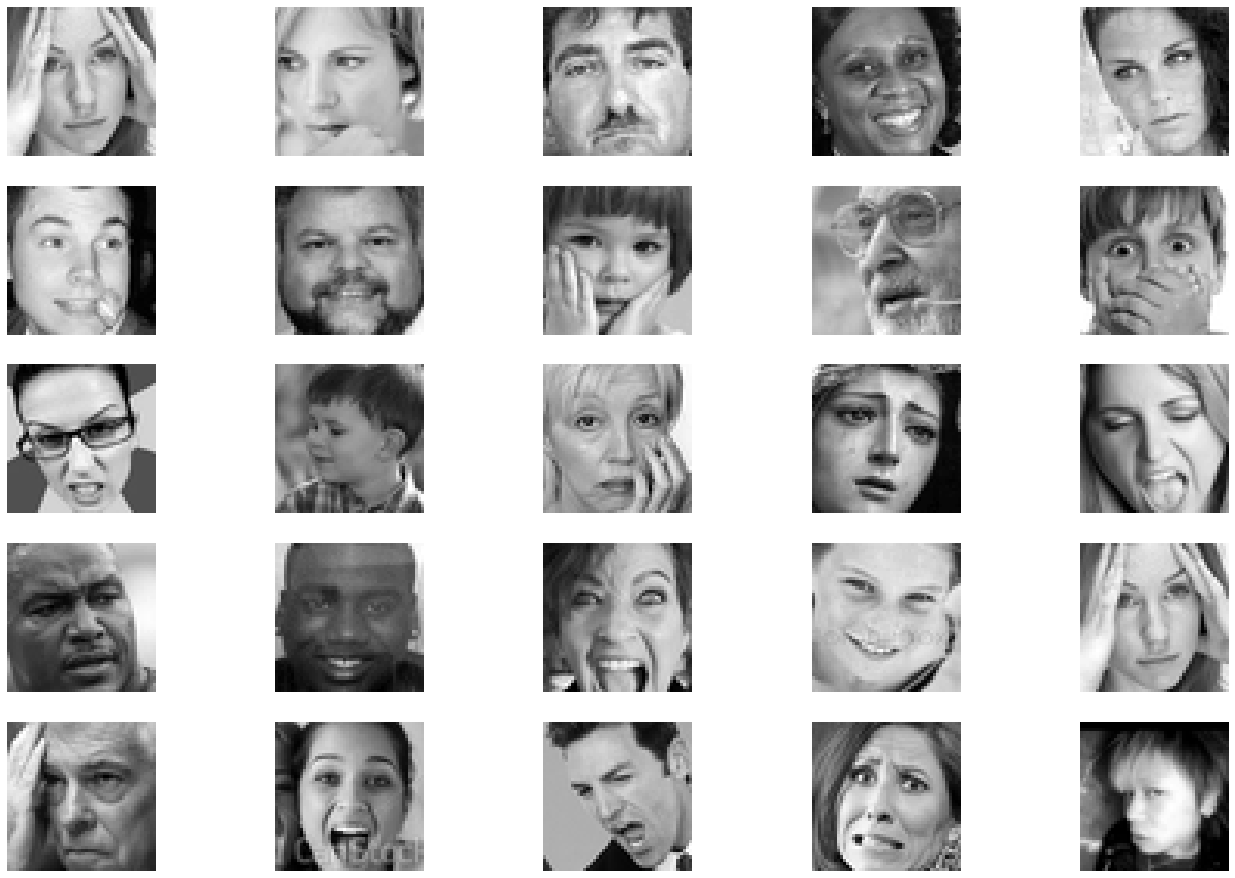

In [14]:
import random
f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = random.randint(0,2000)
        ax[i,j].imshow(imgs[rnd_number],'gray')
        ax[i,j].axis('off')

In [15]:
imgs.max() , imgs.min()

(255.0, 0.0)

In [0]:
del imgs

In [0]:
#update the func , get imgs by x,y
def get_all_imgs_x_y(df):
  trn = df['Usage'].value_counts()['Training']
  tst = df['Usage'].value_counts()['PublicTest'] + df['Usage'].value_counts()['PrivateTest']

  X_train=np.zeros((trn,48,48))
  y_train=np.zeros((trn,7))
  X_test=np.zeros((tst,48,48))
  y_test=np.zeros((tst,7))

  ts=0
  tr=0
  for i in df.values:
    if i[-1]=='Training':
      X_train[tr]=get_img(i[1])/255
      y_train[tr]=one_hot(i[0])
      tr+=1
    else:
      X_test[ts]=get_img(i[1])/255
      y_test[ts]=one_hot(i[0])
      ts+=1
  return X_train,X_test,y_train,y_test

def one_hot(val):
  arr=np.zeros(7)
  arr[val]=1
  return arr

In [0]:
X_train,X_test,y_train,y_test=get_all_imgs_x_y(df)

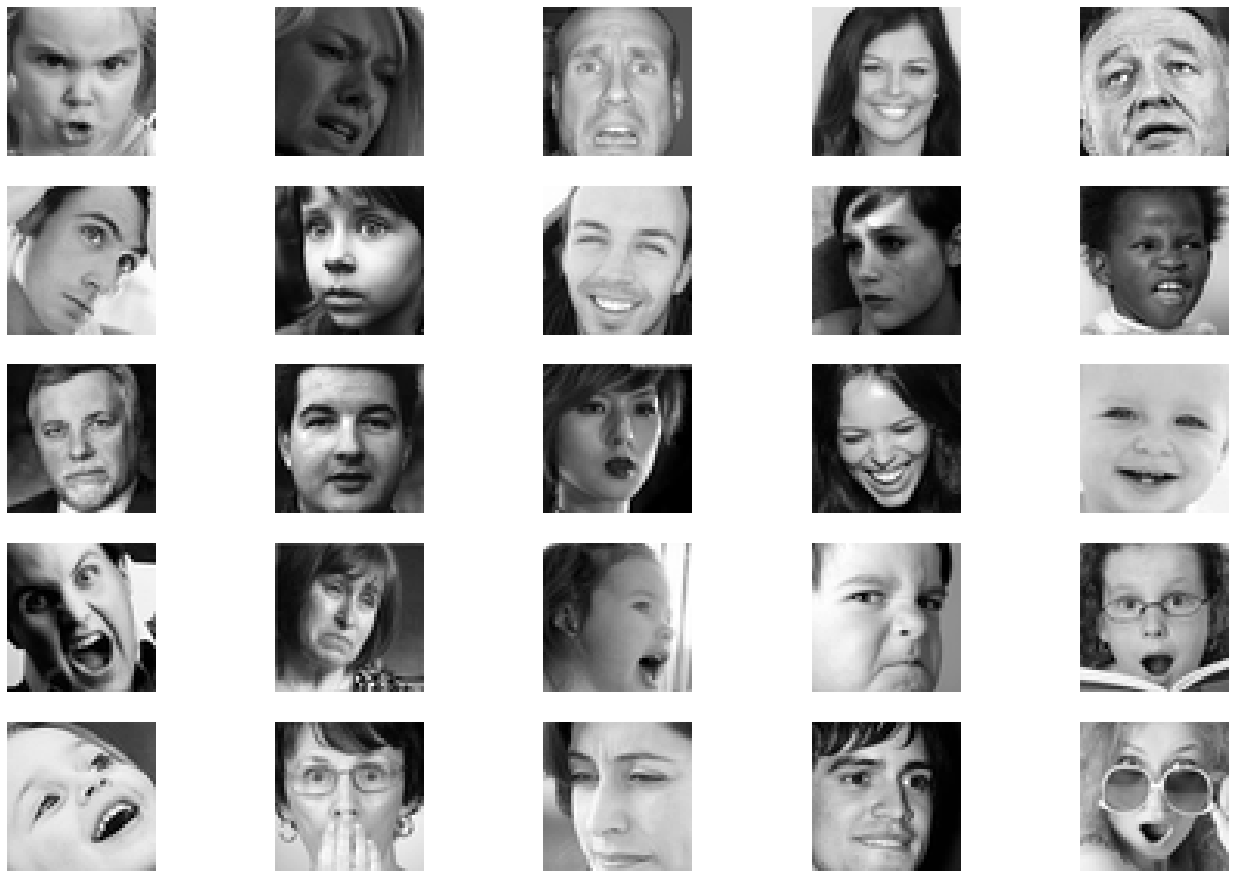

In [19]:
import random
f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = random.randint(0,2000)
        ax[i,j].imshow(X_test[rnd_number],'gray')
        ax[i,j].axis('off')

In [20]:
X_test.max()

1.0

In [21]:
import tensorflow as tf

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout , Flatten ,Conv2D , MaxPool2D ,BatchNormalization 
from tensorflow.keras import optimizers


In [0]:
def setup_model(input_shape):
  model = Sequential()
  model.add(Conv2D(64,(3,3),input_shape=input_shape,activation='relu',padding='same'))
  model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.2))

  model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
  model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
  model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
  model.add(Dropout(0.2))

  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.2))

  model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
  model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
  model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.2))

  model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
  model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
  model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.2))

  model.add(Flatten())
  model.add(Dense(256))
  model.add(Dense(128))
  model.add(Dense(64))

  #model.add(Activation('relu'))
  model.add(Dropout(0.2))
  model.add(Dense(7,activation='softmax'))

  model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
  print(model.summary())
  return model








In [27]:
model=setup_model((48,48,1))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 48, 48, 64)        36928     
_________________________________________________________________
batch_normalization_4 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 64)       

In [28]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],X_train.shape[2],1))

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],X_test.shape[2],1))


training=model.fit(X_train,y_train,
          batch_size=20,
          verbose=1,
          validation_data=(X_test,y_test),
            shuffle=True,
           epochs=30)

Train on 28709 samples, validate on 7178 samples
Epoch 1/30
28709/28709 [==============================] - 18s 610us/sample - loss: 1.9259 - acc: 0.2528 - val_loss: 1.6899 - val_acc: 0.3310
Epoch 2/30
28709/28709 [==============================] - 17s 589us/sample - loss: 1.5783 - acc: 0.3826 - val_loss: 1.5592 - val_acc: 0.3870
Epoch 3/30
28709/28709 [==============================] - 17s 592us/sample - loss: 1.4265 - acc: 0.4470 - val_loss: 1.3660 - val_acc: 0.4760
Epoch 4/30
28709/28709 [==============================] - 17s 587us/sample - loss: 1.3379 - acc: 0.4856 - val_loss: 1.4313 - val_acc: 0.4543
Epoch 5/30
28709/28709 [==============================] - 17s 594us/sample - loss: 1.2780 - acc: 0.5152 - val_loss: 1.2906 - val_acc: 0.5141
Epoch 6/30
28709/28709 [==============================] - 17s 586us/sample - loss: 1.2185 - acc: 0.5368 - val_loss: 1.2078 - val_acc: 0.5422
Epoch 7/30
28709/28709 [==============================] - 17s 589us/sample - loss: 1.1727 - acc: 0.5554 -

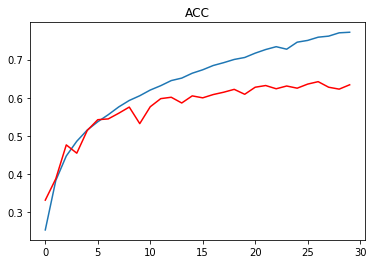

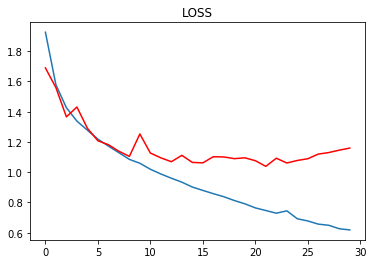

In [29]:
plt.plot(training.history['acc'])
plt.plot(training.history['val_acc'],'red')
plt.title('ACC')
plt.show()

plt.plot(training.history['loss'])
plt.title('LOSS')
plt.plot(training.history['val_loss'],'red')
plt.show()

In [0]:
pre=model.predict(X_test)


In [0]:
def one_to_label(onehot):
  labels=np.zeros(onehot.shape[0])
  for c,i in enumerate(onehot):
    labels[c]=np.argmax(i)
  return labels
  

In [32]:
from sklearn.metrics import confusion_matrix
con=confusion_matrix(one_to_label(y_test),one_to_label(pre))
con

array([[ 422,    9,  116,   73,  186,   24,  128],
       [  15,   56,   16,    5,   15,    3,    1],
       [  72,    5,  398,   54,  234,  119,  142],
       [  19,    0,   27, 1512,   77,   51,   88],
       [  63,    3,  129,   97,  719,   26,  210],
       [  11,    0,   53,   46,   17,  672,   32],
       [  34,    1,   56,  101,  250,   19,  772]])

In [33]:
from sklearn.metrics import classification_report
print(classification_report(one_to_label(y_test),one_to_label(pre)))

              precision    recall  f1-score   support

         0.0       0.66      0.44      0.53       958
         1.0       0.76      0.50      0.61       111
         2.0       0.50      0.39      0.44      1024
         3.0       0.80      0.85      0.83      1774
         4.0       0.48      0.58      0.52      1247
         5.0       0.74      0.81      0.77       831
         6.0       0.56      0.63      0.59      1233

    accuracy                           0.63      7178
   macro avg       0.64      0.60      0.61      7178
weighted avg       0.63      0.63      0.63      7178



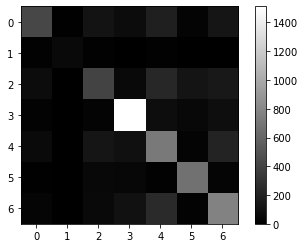

In [34]:
plt.imshow(con,cmap='gray')
plt.colorbar()
plt.show()